# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏—Ç–µ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import string
import nltk
import numpy as np

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

# –ó–∞—Ä–µ–∂–¥–∞–Ω–µ –Ω–∞ –¥–∞–Ω–Ω–∏—Ç–µ

In [4]:
data = pd.read_csv('multitude.csv')

In [5]:
data

text  label  \
0      Der Ausbruch des Coronavirus hat die Entwicklu...      1   
1      Alex Azar was officially sworn in as the U.S. ...      1   
2      –Ñ–≤—Ä–æ–ø–µ–π—Å—å–∫–∏–π —Å–æ—é–∑ –≤–∏–º–∞–≥–∞—î –∑—É–ø–∏–Ω–∏—Ç–∏ —Ä–æ–∑—Ç—Ä–∞—Ç—É –∫–æ...      1   
3      Yesterday, hundreds of Zambian university stud...      1   
4      In a narrow and highly watched vote, the US Se...      1   
...                                                  ...    ...   
74076  –ë–æ–∫—Å–µ—Ä –û–ª–µ–≥ –ú–∞—Å–∫–∞—î–≤ –≤—ñ–¥–∫—Ä–∏–≤ –≤–±–æ–ª—ñ–≤–∞–ª—å–Ω–∏–∫–∞–º, —â–æ...      1   
74077  A sheriff in the state of Texas has reported t...      1   
74078  -------------–£—Ä–æ–≤–µ–Ω—å —É–≥—Ä–æ–∑—ã —Ç–µ—Ä—Ä–æ—Ä–∏–∑–º–∞ –≤ –ë—Ä–∏—Ç–∞...      1   
74079  Former President Olusegun Obasanjo is facing a...      1   
74080  –í–í–ü, —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã–µ –ø—Ä–∏–µ–º–ª–µ–º—ã —Å–æ–∫—Ä–∞—â–µ–Ω–Ω–æ–π —Å–ª—É—á–∞–π–Ω–æ...      1   

            multi_label  split language  length  \
0      text-davinci-003   test       de     174   
1      text-davinci-003  train       en      57   
2         gpt-3.5-turbo   test       uk     105   
3      text-davinci-003  train       en     254   
4                 gpt-4  train       en     416   
...                 ...    ...      ...     ...   
74076     gpt-3.5-turbo   test       uk      86   
74077        vicuna-13b  train       en     178   
74078        vicuna-13b  train       ru      60   
74079        vicuna-13b  train       en     199   
74080  opt-iml-max-1.3b  train       ru      17   

                               source  
0       MULTITuDE_MassiveSumm_spiegel  
1       MULTITuDE_MassiveSumm_voanews  
2      MULTITuDE_MassiveSumm_interfax  
3       MULTITuDE_MassiveSumm_voanews  
4       MULTITuDE_MassiveSumm_voanews  
...                               ...  
74076    MULTITuDE_MassiveSumm_gazeta  
74077   MULTITuDE_MassiveSumm_voanews  
74078       MULTITuDE_MassiveSumm_bbc  
74079   MULTITuDE_MassiveSumm_voanews  
74080     MULTITuDE_MassiveSumm_vesti  

[74081 rows x 7 columns]

text - –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω —Ç–µ–∫—Å—Ç

label - 0 –µ—Ç–∏–∫–µ—Ç –∑–∞ —á–æ–≤–µ—à–∫–∏ –Ω–∞–ø–∏—Å–∞–Ω —Ç–µ–∫—Å—Ç, 1 –∑–∞ AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω —Ç–µ–∫—Å—Ç

multi_label - –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω –µ–∑–∏–∫–æ–≤ –º–æ–¥–µ–ª –∑–∞ –∏–∑–∫—É—Å—Ç–≤–µ–Ω–∏ –∏–Ω—Ç–µ–ª–µ–∫—Ç / human - —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç

split - —Ç–µ–∫—Å—Ç–∞ –∑–∞ –∫–∞–∫–≤–æ —â–µ —Å–µ –∏–∑–ø–æ–ª–∑–≤–∞ - —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–µ–Ω —Å–µ—Ç / —Ç–µ—Å—Ç–æ–≤–∏ —Å–µ—Ç

language - –Ω–∞ –∫–∞–∫—ä–≤ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–µ–Ω –µ–∑–∏–∫ –µ –Ω–∞–ø–∏—Å–∞–Ω —Ç–µ–∫—Å—Ç–∞

length - –¥—ä–ª–∂–∏–Ω–∞—Ç–∞ –Ω–∞ —Ç–µ–∫—Å—Ç–∞

source - –∫–æ–π –µ –∏–∑—Ç–æ—á–Ω–∏–∫–∞ –Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è

# –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∑–∞ –∫–æ–ª–æ–Ω–∏—Ç–µ –∏ —Ç–∏–ø–æ–≤–µ—Ç–µ –¥–∞–Ω–Ω–∏ –≤ —Ç—è—Ö

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74081 entries, 0 to 74080
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         74081 non-null  object
 1   label        74081 non-null  int64 
 2   multi_label  74081 non-null  object
 3   split        74081 non-null  object
 4   language     74081 non-null  object
 5   length       74081 non-null  int64 
 6   source       74081 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.0+ MB


# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥–∞–Ω–Ω–∏—Ç–µ

In [16]:
duplicates = data.duplicated()
total_duplicates = duplicates.sum()
print(f"–û–±—â–æ –¥—É–±–ª–∏—Ä–∞–Ω–∏ —Ä–µ–¥–æ–≤–µ: {total_duplicates}")

–û–±—â–æ –¥—É–±–ª–∏—Ä–∞–Ω–∏ —Ä–µ–¥–æ–≤–µ: 0


In [17]:
missing_values = data.isnull()
total_missing = missing_values.sum()
print(f"–û–±—â–æ –ø—Ä–∞–∑–Ω–∏ —Å—Ç–æ–π–Ω–æ—Å—Ç–∏: {total_missing}")

–û–±—â–æ –ø—Ä–∞–∑–Ω–∏ —Å—Ç–æ–π–Ω–æ—Å—Ç–∏: text           0
label          0
multi_label    0
split          0
language       0
length         0
source         0
dtype: int64


# A–Ω–∞–ª–∏–∑–∏—Ä–∞–º–µ –∏ –ø–æ–¥–≥–æ—Ç–≤—è–º–µ –¥–∞–Ω–Ω–∏—Ç–µ

In [19]:
data.describe()

label        length
count  74081.000000  74081.000000
mean       0.892118    152.552962
std        0.310233     93.107789
min        0.000000      6.000000
25%        1.000000     74.000000
50%        1.000000    142.000000
75%        1.000000    215.000000
max        1.000000    512.000000

count ‚Äì –ë—Ä–æ—è—Ç –Ω–∞ –Ω–µ–Ω—É–ª–µ–≤–∏—Ç–µ —Å—Ç–æ–π–Ω–æ—Å—Ç–∏ –≤—ä–≤ –≤—Å—è–∫–∞ –∫–æ–ª–æ–Ω–∞

mean ‚Äì –°—Ä–µ–¥–Ω–∞—Ç–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç (–∞—Ä–∏—Ç–º–µ—Ç–∏—á–Ω–æ—Ç–æ —Å—Ä–µ–¥–Ω–æ) –Ω–∞ –≤—Å–∏—á–∫–∏ —Å—Ç–æ–π–Ω–æ—Å—Ç–∏ –≤ –∫–æ–ª–æ–Ω–∞—Ç–∞

std ‚Äì –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ—Ç–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: –ø–æ–∫–∞–∑–≤–∞ –∫–æ–ª–∫–æ —Ä–∞–∑–ø—Ä—ä—Å–Ω–∞—Ç–∏ —Å–∞ –¥–∞–Ω–Ω–∏—Ç–µ –æ–∫–æ–ª–æ —Å—Ä–µ–¥–Ω–∞—Ç–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç

min ‚Äì –ù–∞–π-–Ω–∏—Å–∫–∞—Ç–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç –≤ –∫–æ–ª–æ–Ω–∞—Ç–∞

25% ‚Äì –°—Ç–æ–π–Ω–æ—Å—Ç—Ç–∞, –ø–æ–¥ –∫–æ—è—Ç–æ –ø–æ–ø–∞–¥–∞—Ç 25% –æ—Ç –¥–∞–Ω–Ω–∏—Ç–µ

50% (–º–µ–¥–∏–∞–Ω–∞) ‚Äì –¶–µ–Ω—Ç—Ä–∞–ª–Ω–∞—Ç–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç: 50% –æ—Ç —Å—Ç–æ–π–Ω–æ—Å—Ç–∏—Ç–µ —Å–∞ –ø–æ-–º–∞–ª–∫–∏, –∞ 50% ‚Äî –ø–æ-–≥–æ–ª–µ–º–∏

75% ‚Äì –°—Ç–æ–π–Ω–æ—Å—Ç—Ç–∞, –ø–æ–¥ –∫–æ—è—Ç–æ —Å–∞ 75% –æ—Ç –¥–∞–Ω–Ω–∏—Ç–µ

max ‚Äì –ù–∞–π-–≤–∏—Å–æ–∫–∞—Ç–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç –≤ –∫–æ–ª–æ–Ω–∞—Ç–∞

label
1    66089
0     7992
Name: count, dtype: int64


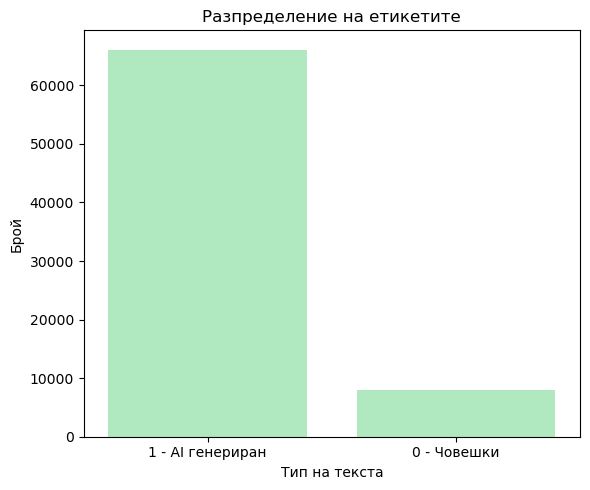

In [28]:
# –†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –µ—Ç–∏–∫–µ—Ç–∏
duplicate_data = data.copy()
print(duplicate_data['label'].value_counts())

plt.figure(figsize=(6, 5))
sns.countplot(x=duplicate_data['label'].replace({0: '0 - –ß–æ–≤–µ—à–∫–∏', 1: '1 - AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω'}), color='#A6F3BC')
plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –µ—Ç–∏–∫–µ—Ç–∏—Ç–µ')
plt.xlabel('–¢–∏–ø –Ω–∞ —Ç–µ–∫—Å—Ç–∞')
plt.ylabel('–ë—Ä–æ–π')
plt.tight_layout()
plt.show()

In [29]:
# –ë—Ä–æ–π –∏–∑—Ç–æ—á–Ω–∏—Ü–∏ –Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è
print(duplicate_data['source'].value_counts())

source
MULTITuDE_MassiveSumm_voanews           26434
MULTITuDE_MassiveSumm_globalvoices       4947
MULTITuDE_MassiveSumm_20minutos          4680
MassiveSumm_voanews                      3107
MULTITuDE_MassiveSumm_ria                2985
                                        ...  
MassiveSumm_golosameriki                   22
MassiveSumm_faz                            14
MassiveSumm_mos                            10
MULTITuDE_MassiveSumm_amerikaninsesi        8
MassiveSumm_golem                           5
Name: count, Length: 75, dtype: int64


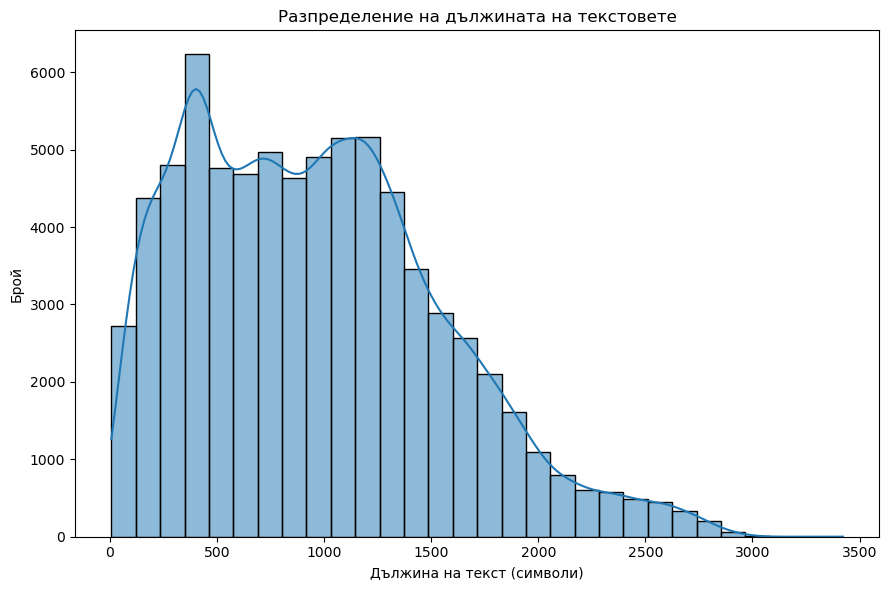

In [30]:
plt.figure(figsize=(9, 6))
sns.histplot(duplicate_data['text'].dropna().apply(len), kde=True, bins=30)
plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –¥—ä–ª–∂–∏–Ω–∞—Ç–∞ –Ω–∞ —Ç–µ–∫—Å—Ç–æ–≤–µ—Ç–µ')
plt.ylabel('–ë—Ä–æ–π')
plt.xlabel('–î—ä–ª–∂–∏–Ω–∞ –Ω–∞ —Ç–µ–∫—Å—Ç (—Å–∏–º–≤–æ–ª–∏)')
plt.tight_layout()
plt.show()

–ë—Ä–æ–π –∑–∞–ø–∏—Å–∏ –ø–æ –µ–∑–∏—Ü–∏:
language
en    29460
es    11586
ru    11578
nl     2695
ca     2691
cs     2689
de     2685
zh     2683
pt     2673
ar     2673
uk     2668
Name: count, dtype: int64


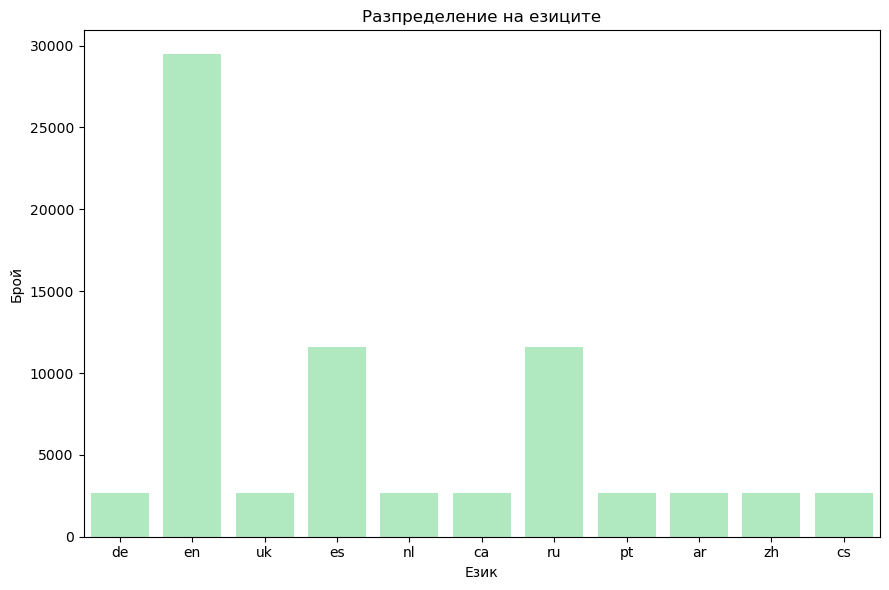

In [31]:
# –ë—Ä–æ–π –µ–∑–∏—Ü–∏ + –≥—Ä–∞—Ñ–∏–∫–∞
if 'language' in duplicate_data.columns:
    print("–ë—Ä–æ–π –∑–∞–ø–∏—Å–∏ –ø–æ –µ–∑–∏—Ü–∏:")
    print(duplicate_data['language'].value_counts())

    # –ì—Ä–∞—Ñ–∏–∫–∞
    plt.figure(figsize=(9, 6))
    sns.countplot(x='language', data=duplicate_data, color='#A6F3BC')
    plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –µ–∑–∏—Ü–∏—Ç–µ')
    plt.ylabel('–ë—Ä–æ–π')
    plt.xlabel('–ï–∑–∏–∫')
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9344\3749792275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette='Set2')


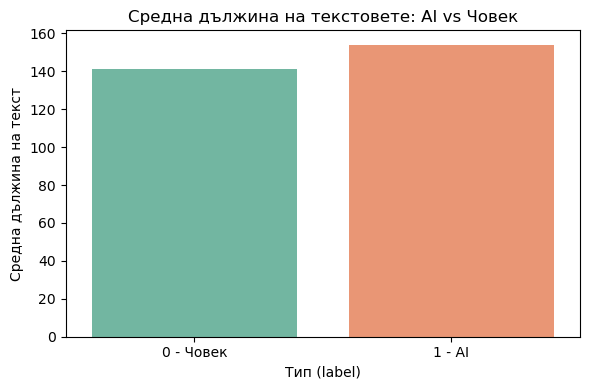

In [32]:
# –°—Ä–µ–¥–Ω–∞—Ç–∞ –¥—ä–ª–∂–∏–Ω–∞ –Ω–∞ —Ç–µ–∫—Å—Ç–æ–≤–µ—Ç–µ —Å–ø–æ—Ä–µ–¥ —Ç–æ–∑–∏ –µ—Ç–∏–∫–µ—Ç 
avg_lengths = duplicate_data.groupby('label')['length'].mean()
avg_lengths.index = avg_lengths.index.map({0: '0 - –ß–æ–≤–µ–∫', 1: '1 - AI'})

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette='Set2')
plt.title('–°—Ä–µ–¥–Ω–∞ –¥—ä–ª–∂–∏–Ω–∞ –Ω–∞ —Ç–µ–∫—Å—Ç–æ–≤–µ—Ç–µ: AI vs –ß–æ–≤–µ–∫')
plt.ylabel('–°—Ä–µ–¥–Ω–∞ –¥—ä–ª–∂–∏–Ω–∞ –Ω–∞ —Ç–µ–∫—Å—Ç')
plt.xlabel('–¢–∏–ø (label)')
plt.tight_layout()
plt.show()

In [33]:
# –ò–∑–º–µ—Ä–≤–∞–Ω–µ –Ω–∞ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ—Ç–æ –Ω–∞ –ª–µ–∫—Å–∏–∫–∞—Ç–∞ (Lexical Diversity)
languages = duplicate_data['language'].unique()

def get_top_words(df, lang, label, n=10):
    subset = df[(df['language'] == lang) & (df['label'] == label)]
    all_text = ' '.join(subset['text'].dropna()).lower()
    all_text = all_text.translate(str.maketrans('', '', string.punctuation))
    words = all_text.split()

    try:
        stop_words = set(stopwords.words(lang))
        words = [w for w in words if w not in stop_words]
    except:
        pass

    return Counter(words).most_common(n)
    
for lang in languages:
    for label in [0, 1]:  # 0 = —á–æ–≤–µ–∫, 1 = AI
        get_top_words(data, lang=lang, label=label)

def lexical_diversity(df, lang, label):
    subset = df[(df['language'] == lang) & (df['label'] == label)].copy()  
    subset.loc[:, 'word_count'] = subset['text'].apply(lambda x: len(x.split()))  
    subset.loc[:, 'unique_word_count'] = subset['text'].apply(lambda x: len(set(x.split())))
    subset.loc[:, 'lexical_diversity'] = subset['unique_word_count'] / subset['word_count']
    return subset['lexical_diversity'].mean()


# –ó–∞ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ –Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–∏
lexical_diversity_human = lexical_diversity(data, lang='en', label=0)
print("–õ–µ–∫—Å–∏–∫–∞–ª–Ω–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –∑–∞ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç:", lexical_diversity_human)

# –ó–∞ AI —Ç–µ–∫—Å—Ç–æ–≤–µ –Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–∏
lexical_diversity_ai = lexical_diversity(data, lang='en', label=1)
print("–õ–µ–∫—Å–∏–∫–∞–ª–Ω–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –∑–∞ AI:", lexical_diversity_ai)

–õ–µ–∫—Å–∏–∫–∞–ª–Ω–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –∑–∞ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç: 0.6948176707091046
–õ–µ–∫—Å–∏–∫–∞–ª–Ω–æ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ –∑–∞ AI: 0.6545827003975897


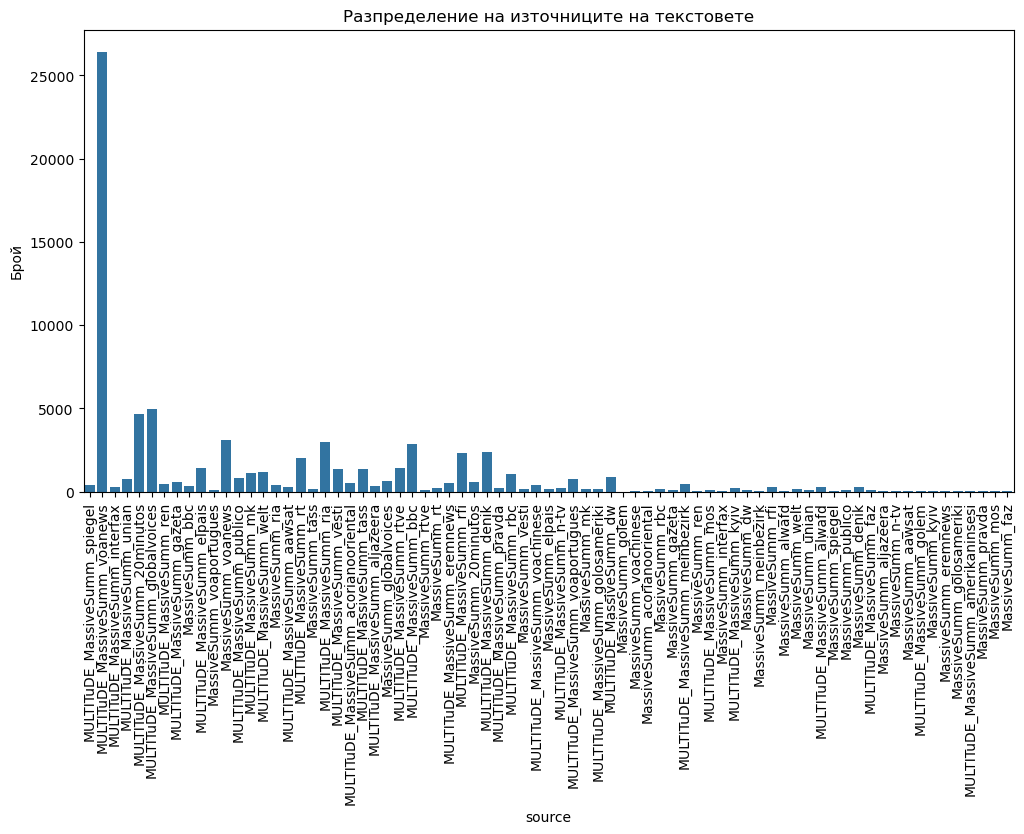

–¢–æ–ø 5 –∏–∑—Ç–æ—á–Ω–∏–∫–∞ –ø–æ –±—Ä–æ–π —Ç–µ–∫—Å—Ç–æ–≤–µ:
source
MULTITuDE_MassiveSumm_voanews         26434
MULTITuDE_MassiveSumm_globalvoices     4947
MULTITuDE_MassiveSumm_20minutos        4680
MassiveSumm_voanews                    3107
MULTITuDE_MassiveSumm_ria              2985
Name: count, dtype: int64


In [34]:
# –ê–Ω–∞–ª–∏–∑ –Ω–∞ –∏–∑—Ç–æ—á–Ω–∏—Ü–∏—Ç–µ –Ω–∞ —Ç–µ–∫—Å—Ç–∞
plt.figure(figsize=(12, 6))
sns.countplot(x='source', data=duplicate_data)
plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –∏–∑—Ç–æ—á–Ω–∏—Ü–∏—Ç–µ –Ω–∞ —Ç–µ–∫—Å—Ç–æ–≤–µ—Ç–µ')
plt.xticks(rotation=90)
plt.ylabel('–ë—Ä–æ–π')
plt.show()

top_sources = duplicate_data['source'].value_counts().head(5)
print("–¢–æ–ø 5 –∏–∑—Ç–æ—á–Ω–∏–∫–∞ –ø–æ –±—Ä–æ–π —Ç–µ–∫—Å—Ç–æ–≤–µ:")
print(top_sources)

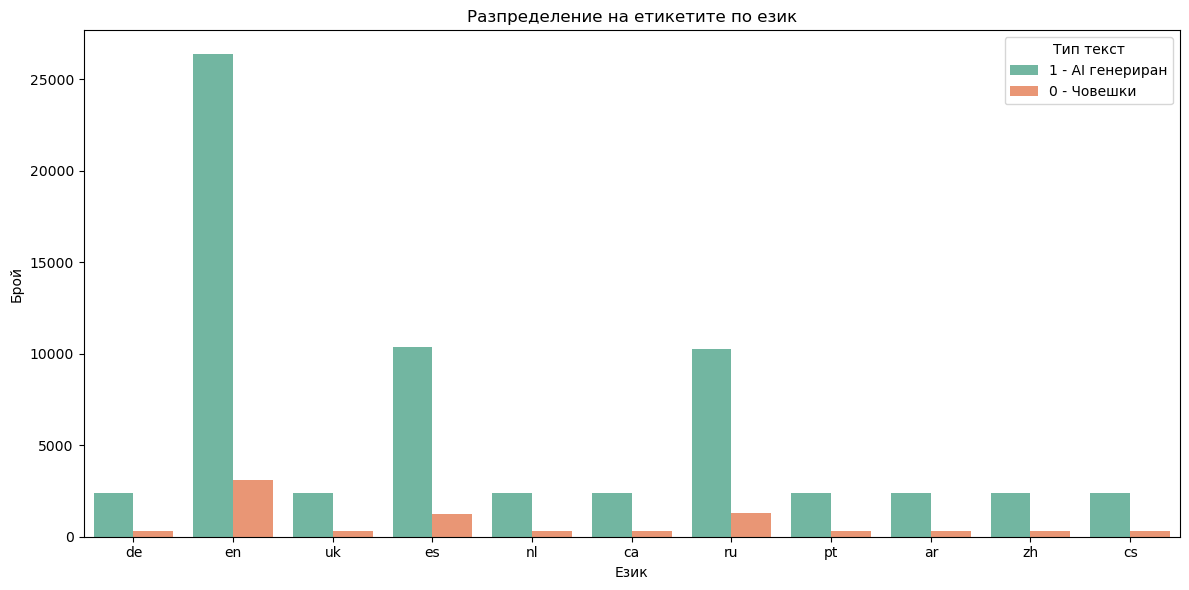

In [35]:
plt.figure(figsize=(12, 6))

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–≤–∞–º–µ —Å–∞–º–æ –∑–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è—Ç–∞ –Ω–∞ hue
sns.countplot(
    x='language',
    hue=duplicate_data['label'].replace({0: '0 - –ß–æ–≤–µ—à–∫–∏', 1: '1 - AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω'}),
    data=duplicate_data,
    palette='Set2'
)

plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –µ—Ç–∏–∫–µ—Ç–∏—Ç–µ –ø–æ –µ–∑–∏–∫')
plt.ylabel('–ë—Ä–æ–π')
plt.xlabel('–ï–∑–∏–∫')
plt.legend(title='–¢–∏–ø —Ç–µ–∫—Å—Ç')
plt.tight_layout()
plt.show()

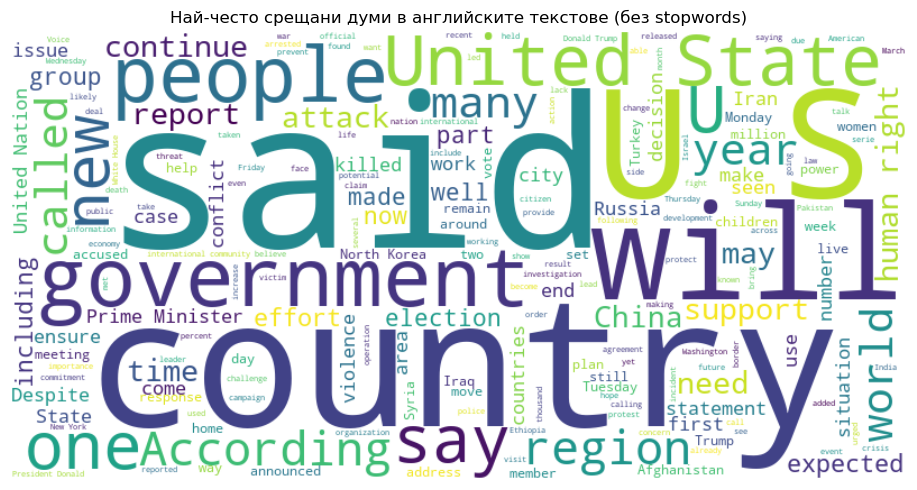

In [36]:
# –ù–∞–π-—á–µ—Å—Ç–æ –∏–∑–ø–æ–ª–∑–≤–∞–Ω–∏—Ç–µ –¥—É–º–∏ –≤ –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–µ
en_texts = duplicate_data[duplicate_data['language'] == 'en']['text'].dropna().astype(str)

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(en_texts)
words = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

word_freq = pd.DataFrame({'word': words, 'count': counts})
top_words = word_freq.sort_values(by='count', ascending=False).head(20)
custom_stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords
).generate(" ".join(en_texts))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('–ù–∞–π-—á–µ—Å—Ç–æ —Å—Ä–µ—â–∞–Ω–∏ –¥—É–º–∏ –≤ –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–µ (–±–µ–∑ stopwords)')
plt.tight_layout()
plt.show()

split
train    44786
test     29295
Name: count, dtype: int64


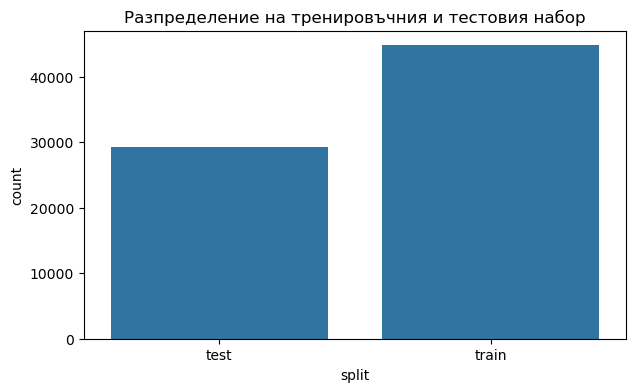

In [37]:
# –†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–Ω–∏—è –∏ —Ç–µ—Å—Ç–æ–≤–∏—è –Ω–∞–±–æ—Ä
# –ö–æ–ª–∫–æ –ø—Ä–∏–º–µ—Ä–∏ —Å–∞ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–Ω–∏—è –∏ —Ç–µ—Å—Ç–æ–≤–∏—è –Ω–∞–±–æ—Ä.
print(duplicate_data['split'].value_counts())

plt.figure(figsize=(7, 4))
sns.countplot(x='split', data=duplicate_data)
plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–Ω–∏—è –∏ —Ç–µ—Å—Ç–æ–≤–∏—è –Ω–∞–±–æ—Ä')
plt.show()

In [38]:
# –†–∞–∑–¥–µ–ª—è–Ω–µ –Ω–∞ –¥–∞–Ω–Ω–∏—Ç–µ –≤—ä–∑ –æ—Å–Ω–æ–≤–∞ –Ω–∞ –∫–æ–ª–æ–Ω–∞—Ç–∞ 'split'
train_data = duplicate_data[duplicate_data['split'] == 'train']
test_data = duplicate_data[duplicate_data['split'] == 'test']

print(f"–ï–∑–∏—Ü–∏ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–Ω–∏—è –Ω–∞–±–æ—Ä: {train_data['language'].value_counts()}")
print(f"–ï–∑–∏—Ü–∏ –≤ —Ç–µ—Å—Ç–æ–≤–∏—è –Ω–∞–±–æ—Ä: {test_data['language'].value_counts()}")

–ï–∑–∏—Ü–∏ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–Ω–∏—è –Ω–∞–±–æ—Ä: language
en    26969
es     8910
ru     8907
Name: count, dtype: int64
–ï–∑–∏—Ü–∏ –≤ —Ç–µ—Å—Ç–æ–≤–∏—è –Ω–∞–±–æ—Ä: language
nl    2695
ca    2691
cs    2689
de    2685
zh    2683
es    2676
pt    2673
ar    2673
ru    2671
uk    2668
en    2491
Name: count, dtype: int64


In [39]:
# –ü–æ–Ω–µ–∂–µ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–Ω–∏—è –∏–º–∞–º 3 –µ–∑–∏–∫–∞, –∏–∑—Ä–∞–≤–Ω—è–≤–∞–º–µ –∏ –≤ —Ç–µ—Å—Ç–æ–≤–∏—è –¥–∞ –∏–º–∞ —Å—ä—â–∏—Ç–µ —Ç—Ä–∏
# –ò–∑–≤–ª–∏—á–∞–º–µ —Å–ø–∏—Å—ä–∫–∞ —Å –µ–∑–∏—Ü–∏—Ç–µ –æ—Ç train_data (—É–Ω–∏–∫–∞–ª–Ω–∏ —Å—Ç–æ–π–Ω–æ—Å—Ç–∏)
train_languages = train_data['language'].unique()
filtered_test_data = test_data[test_data['language'].isin(train_languages)]
print("–ï–∑–∏—Ü–∏ —Å–ª–µ–¥ —Ñ–∏–ª—Ç—Ä–∏—Ä–∞–Ω–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–∏—è –Ω–∞–±–æ—Ä:")
print(filtered_test_data['language'].value_counts())

–ï–∑–∏—Ü–∏ —Å–ª–µ–¥ —Ñ–∏–ª—Ç—Ä–∏—Ä–∞–Ω–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–∏—è –Ω–∞–±–æ—Ä:
language
es    2676
ru    2671
en    2491
Name: count, dtype: int64


In [40]:
filtered_test_data

text  label  \
7      International surgeons from around the world h...      1   
18     The construction of the Grand Ethiopian Renais...      1   
28     –°—É–¥ –ø–æ –¥–µ–ª—É –æ–± —É–±–∏–π—Å—Ç–≤–µ –ë–æ—Ä–∏—Å–∞ –ù–µ–º—Ü–æ–≤–∞ —É–¥–æ–≤–ª–µ—Ç...      0   
46     The launch of the space shuttle Discovery has ...      1   
54     El general Carlos Rojas durante el juicio cont...      1   
...                                                  ...    ...   
74025  Literatura inglesa: regular. Franc√©s: prosa mu...      0   
74043  A suicide bomber attacked a group of Chinese e...      1   
74051  –°–æ–≥–ª–∞—Å–Ω–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –æ—Ç –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ ...      1   
74053  en un nuevo mar de la noche. Se desprende de s...      1   
74060  , tras la decisi√≥n del Gobierno de no retener ...      1   

            multi_label split language  length  \
7       alpaca-lora-30b  test       en     156   
18        gpt-3.5-turbo  test       en     272   
28                human  test       ru      79   
46        gpt-3.5-turbo  test       en     171   
54              opt-66b  test       es     212   
...                 ...   ...      ...     ...   
74025             human  test       es      19   
74043     gpt-3.5-turbo  test       en     156   
74051        vicuna-13b  test       ru     125   
74053  opt-iml-max-1.3b  test       es     182   
74060  opt-iml-max-1.3b  test       es      23   

                                source  
7        MULTITuDE_MassiveSumm_voanews  
18       MULTITuDE_MassiveSumm_voanews  
28                     MassiveSumm_bbc  
46       MULTITuDE_MassiveSumm_voanews  
54            MULTITuDE_MassiveSumm_rt  
...                                ...  
74025                  MassiveSumm_bbc  
74043    MULTITuDE_MassiveSumm_voanews  
74051        MULTITuDE_MassiveSumm_ria  
74053  MULTITuDE_MassiveSumm_20minutos  
74060  MULTITuDE_MassiveSumm_20minutos  

[7838 rows x 7 columns]

In [41]:
# –ü—Ä–µ–º–∞—Ö–≤–∞–º–µ —Å—Ç–∞—Ä–∏—Ç–µ —Ç–µ—Å—Ç–æ–≤–∏ –¥–∞–Ω–Ω–∏ —Å –≤—Å–∏—á–∫–∏ –µ–∑–∏—Ü–∏ –æ—Ç duplicate_data
duplicate_data = duplicate_data[duplicate_data['split'] != 'test']

# –î–æ–±–∞–≤—è–º–µ –æ–±—Ä–∞—Ç–Ω–æ —Å–∞–º–æ —Ñ–∏–ª—Ç—Ä–∏—Ä–∞–Ω–∏—Ç–µ —Ä–µ–¥–æ–≤–µ
duplicate_data = pd.concat([duplicate_data, filtered_test_data], ignore_index=True)

print("–ù–æ–≤–∏ –µ–∑–∏—Ü–∏ –≤ duplicate_data –∑–∞ split='test':")
print(duplicate_data[duplicate_data['split'] == 'test']['language'].value_counts())

–ù–æ–≤–∏ –µ–∑–∏—Ü–∏ –≤ duplicate_data –∑–∞ split='test':
language
es    2676
ru    2671
en    2491
Name: count, dtype: int64


In [42]:
duplicate_data

text  label  \
0      Alex Azar was officially sworn in as the U.S. ...      1   
1      Yesterday, hundreds of Zambian university stud...      1   
2      In a narrow and highly watched vote, the US Se...      1   
3      In the aftermath of the Paris attacks, the Rep...      1   
4      Voice of America (VOA), the official broadcast...      1   
...                                                  ...    ...   
52619  Literatura inglesa: regular. Franc√©s: prosa mu...      0   
52620  A suicide bomber attacked a group of Chinese e...      1   
52621  –°–æ–≥–ª–∞—Å–Ω–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –æ—Ç –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ ...      1   
52622  en un nuevo mar de la noche. Se desprende de s...      1   
52623  , tras la decisi√≥n del Gobierno de no retener ...      1   

            multi_label  split language  length  \
0      text-davinci-003  train       en      57   
1      text-davinci-003  train       en     254   
2                 gpt-4  train       en     416   
3               opt-66b  train       en     324   
4      text-davinci-003  train       en      22   
...                 ...    ...      ...     ...   
52619             human   test       es      19   
52620     gpt-3.5-turbo   test       en     156   
52621        vicuna-13b   test       ru     125   
52622  opt-iml-max-1.3b   test       es     182   
52623  opt-iml-max-1.3b   test       es      23   

                                source  
0        MULTITuDE_MassiveSumm_voanews  
1        MULTITuDE_MassiveSumm_voanews  
2        MULTITuDE_MassiveSumm_voanews  
3        MULTITuDE_MassiveSumm_voanews  
4        MULTITuDE_MassiveSumm_voanews  
...                                ...  
52619                  MassiveSumm_bbc  
52620    MULTITuDE_MassiveSumm_voanews  
52621        MULTITuDE_MassiveSumm_ria  
52622  MULTITuDE_MassiveSumm_20minutos  
52623  MULTITuDE_MassiveSumm_20minutos  

[52624 rows x 7 columns]

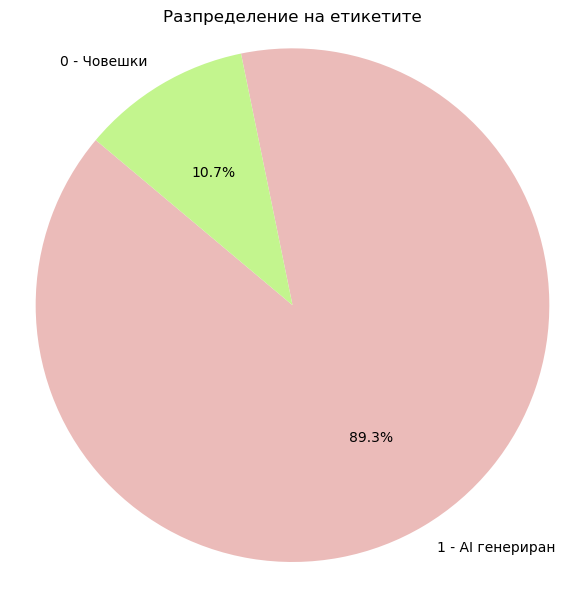

–ß–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 0): 5617 (10.67%)
AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 1): 47007 (89.33%)


In [43]:
# –†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –µ—Ç–∏–∫–µ—Ç–∏ –≤—ä–≤ duplicate_data
label_counts = duplicate_data['label'].value_counts()

labels = label_counts.index.map({0: '0 - –ß–æ–≤–µ—à–∫–∏', 1: '1 - AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω'})
sizes = label_counts.values
colors = ['#ebbbb9', '#c3f58e'] 

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –µ—Ç–∏–∫–µ—Ç–∏—Ç–µ')
plt.axis('equal') 
plt.tight_layout()
plt.show()

total = label_counts.sum()
percent_0 = (label_counts.get(0, 0) / total) * 100
percent_1 = (label_counts.get(1, 0) / total) * 100
print(f"–ß–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 0): {label_counts.get(0, 0)} ({percent_0:.2f}%)")
print(f"AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 1): {label_counts.get(1, 0)} ({percent_1:.2f}%)")

–ü–æ–Ω–µ–∂–µ –∑–∞–ø–∏—Å–∏—Ç–µ –Ω–∞ AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏—è —Ç–µ–∫—Å—Ç —Å–∞ –º–Ω–æ–≥–æ –ø–æ–≤–µ—á–µ –æ—Ç —á–æ–≤–µ—à–∫–∏—Ç–µ, –º–æ–∂–µ –¥–∞ –ø–æ–≤–ª–∏—è–µ –Ω–∞ –∫—Ä–∞–π–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—Ç–∞—Ç–∏ –ø—Ä–∏ –∏–∑–ø–æ–ª–∑–≤–∞–Ω–µ—Ç–æ –Ω–∞ –º–æ–¥–µ–ª–∏—Ç–µ. –ó–∞—Ç–æ–≤–∞ –Ω–∞–π-–ø–æ–¥—Ö–æ–¥—è—â–∏—è –Ω–∞—á–∏–Ω –¥–∞ –ø—Ä–æ–¥—ä–ª–∂–∏–º –µ —Å under-sampling.

In [45]:
# –ü—Ä–µ–º–∞—Ö–≤–∞–º–µ –¥–∞–Ω–Ω–∏ –æ—Ç 1-AI, –∑–∞ –¥–∞ —Å—Ç–∞–Ω–µ –±–∞–ª–∞–Ω—Å–∏—Ä–∞–Ω –¥–∞—Ç–∞—Ç—Å–µ—Ç–∞
train_data = duplicate_data[duplicate_data['split'] == 'train']
test_data = duplicate_data[duplicate_data['split'] == 'test']

X_train = train_data['text']
y_train = train_data['label']

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–≤–∞–º–µ —Ç–µ–∫—Å—Ç–æ–≤–µ—Ç–µ —Å TF-IDF —Å–∞–º–æ —Å –∞–Ω–≥–ª–∏–π—Å–∫–∏ —Å—Ç–æ–ø –¥—É–º–∏, –∑–∞—â–æ—Ç–æ –Ω–µ –∏—Å–∫–∞–º–µ –¥–∞ –ø—Ä–∏—Ö–≤–∞—â–∞–º–µ –¥—É–º–∏ –∫–∞—Ç–æ the, on, a, in ...
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)

# –ü—Ä–∏–ª–∞–≥–∞–º–µ undersampling, –∑–∞ –¥–∞ –±–∞–ª–∞–Ω—Å–∏—Ä–∞–º–µ label=0 –∏ label=1
rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train_vec, y_train)

# –°—ä–∑–¥–∞–≤–∞–º–µ –Ω–æ–≤ DataFrame —Å –æ—Ä–∏–≥–∏–Ω–∞–ª–Ω–∏—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–µ (–ø–æ –∏–Ω–¥–µ–∫—Å–∏ –Ω–∞ undersampled)
balanced_indices = rus.sample_indices_
df_balanced = train_data.iloc[balanced_indices].reset_index(drop=True)

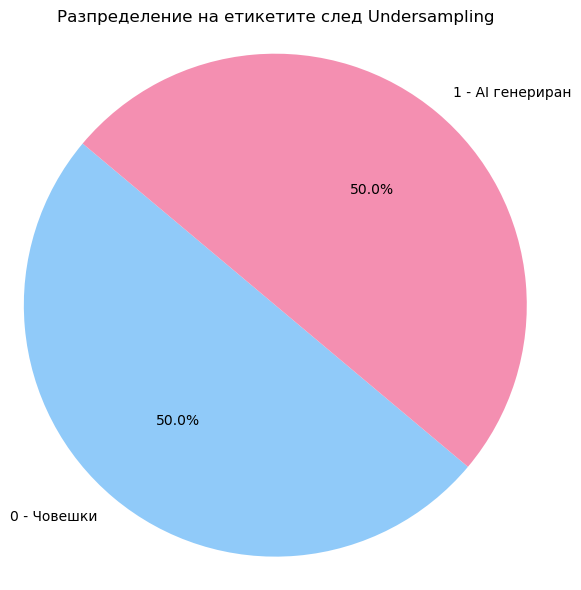

–ß–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 0): 4756
AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 1): 4756


In [46]:
# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–∞–º–µ —Å–ª–µ–¥ under-sampling
label_counts = df_balanced['label'].value_counts()
labels = label_counts.index.map({0: '0 - –ß–æ–≤–µ—à–∫–∏', 1: '1 - AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω'})
sizes = label_counts.values
colors = ['#90caf9', '#f48fb1']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('–†–∞–∑–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –µ—Ç–∏–∫–µ—Ç–∏—Ç–µ —Å–ª–µ–¥ Undersampling')
plt.axis('equal')
plt.tight_layout()
plt.show()

count_0 = label_counts.get(0, 0)
count_1 = label_counts.get(1, 0)

print(f"–ß–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 0): {count_0}")
print(f"AI –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (label = 1): {count_1}")

–°–∞–º–æ 4756 —Ç–µ–∫—Å—Ç–∞ —Å–∞ –æ—Ç —á–æ–≤–µ–∫ –≤ train_data, —Ç—ä–π –∫–∞—Ç–æ –æ—Å—Ç–∞–Ω–∞–ª–∏—Ç–µ 861 —Å–∞ –≤ split='test'

In [48]:
df_balanced

text  label  \
0     Israeli security guards have foiled an alleged...      0   
1     WASHINGTON - No matter what happens with the n...      0   
2     –°–æ–≤–µ—â–∞–Ω–∏–µ —Å –≥–ª–∞–≤–∞–º–∏ —Ä–µ–≥–∏–æ–Ω–æ–≤ –°–µ–≤–µ—Ä–Ω–æ–≥–æ –ö–∞–≤–∫–∞–∑–∞...      0   
3     –ù–ê–õ–¨–ß–ò–ö, 28 –∞–≤–≥ ‚Äî –†–ò–ê –ù–æ–≤–æ—Å—Ç–∏. –ú–∏–Ω–∏—Å—Ç–µ—Ä—Å—Ç–≤–æ —Å—Ç...      0   
4     Fri, 02/05/2021 - 05:05 PMCOVID-19 Variants: U...      0   
...                                                 ...    ...   
9507  –°–µ–≥–æ–¥–Ω—è —Å—Ç–∞–ª–æ –∏–∑–≤–µ—Å—Ç–Ω–æ –æ —Ç—Ä–∞–≥–∏—á–µ—Å–∫–æ–º –∏–Ω—Ü–∏–¥–µ–Ω—Ç–µ...      1   
9508  On July 12th, Dr. Fakhruddin Attar was arreste...      1   
9509  –í —Å—Ä–µ–¥—É, –¥–≤–µ–Ω–∞–¥—Ü–∞—Ç–æ–µ —Ñ–µ–≤—Ä–∞–ª—è, –≤–ª–∞—Å—Ç–∏ –•–µ–ª—å—Å–∏–Ω–∫–∏...      1   
9510  The United States Department of State has cond...      1   
9511  "–ó–∞–≤–æ–¥ —Ä–∞–±–æ—Ç–∞–µ—Ç –±–µ–∑ –±—Ä–∞–∫–∞. –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã –æ–±–Ω–∞—Ä—É–∂...      1   

           multi_label  split language  length  \
0                human  train       en     129   
1                human  train       en     241   
2                human  train       ru      79   
3                human  train       ru      58   
4                human  train       en      11   
...                ...    ...      ...     ...   
9507             gpt-4  train       ru     103   
9508   alpaca-lora-30b  train       en      93   
9509  text-davinci-003  train       ru      43   
9510  text-davinci-003  train       en     167   
9511        vicuna-13b  train       ru     130   

                                  source  
0                    MassiveSumm_voanews  
1                    MassiveSumm_voanews  
2                        MassiveSumm_bbc  
3                        MassiveSumm_ria  
4                    MassiveSumm_voanews  
...                                  ...  
9507  MULTITuDE_MassiveSumm_golosameriki  
9508       MULTITuDE_MassiveSumm_voanews  
9509           MULTITuDE_MassiveSumm_ria  
9510       MULTITuDE_MassiveSumm_voanews  
9511            MULTITuDE_MassiveSumm_mk  

[9512 rows x 7 columns]

# –ö–æ—Ä–µ–ª–∞—Ü–∏—è

In [50]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–≤–∞–º–µ language –ø–æ –∑–∞–¥–∞–¥–µ–Ω–∏ —Å—Ç–æ–π–Ω–æ—Å—Ç–∏: en ‚Üí 1, ru ‚Üí 2, es ‚Üí 3
df_balanced['language'] = df_balanced['language'].map({'en': 1, 'ru': 2, 'es': 3})

             label    length  language
label     1.000000  0.062082 -0.005646
length    0.062082  1.000000 -0.359993
language -0.005646 -0.359993  1.000000


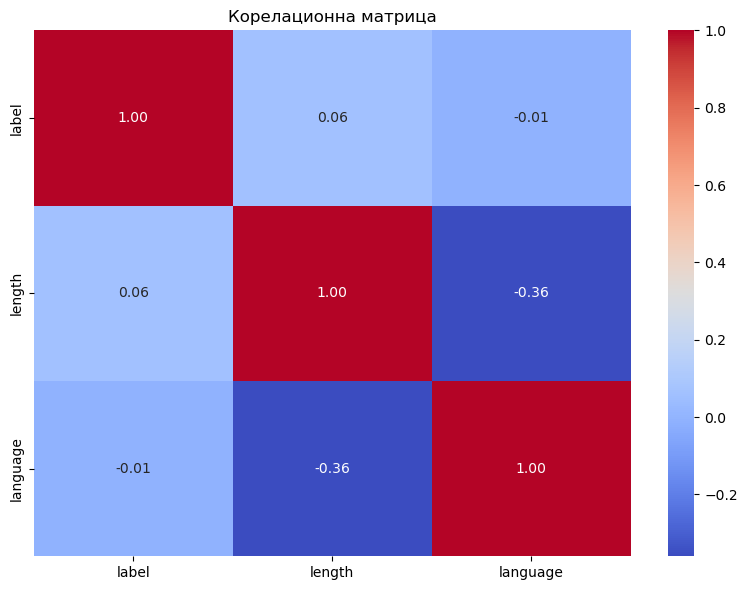

In [51]:
corr_data = df_balanced[['label', 'length', 'language']]
corr_matrix = corr_data.corr()

print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('–ö–æ—Ä–µ–ª–∞—Ü–∏–æ–Ω–Ω–∞ –º–∞—Ç—Ä–∏—Ü–∞')
plt.tight_layout()
plt.show()

# –†–∞–∑–¥–µ–ª—è–Ω–µ –Ω–∞ –¥–∞–Ω–Ω–∏—Ç–µ –Ω–∞ train –∏ test

In [53]:
X = df_balanced['text']
y = df_balanced['label']

# –†–∞–∑–¥–µ–ª—è–Ω–µ: 70% train / 30% test
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42, stratify=y)

df_balanced['split'] = 'test'  
df_balanced.loc[X_train.index, 'split'] = 'train'  # –ú–∞—Ä–∫–∏—Ä–∞–º–µ —Ç—Ä–µ–Ω–∏—Ä–æ–≤—ä—á–Ω–∏—Ç–µ

print(df_balanced['split'].value_counts())

split
train    6658
test     2854
Name: count, dtype: int64


# Logistic Regression

In [55]:
train_df = df_balanced[df_balanced['split'] == 'train']
test_df = df_balanced[df_balanced['split'] == 'test']

# –ù–∞—Å—Ç—Ä–æ–π–≤–∞–º–µ pipeline: TF-IDF + –ª–æ–≥–∏—Å—Ç–∏—á–Ω–∞ —Ä–µ–≥—Ä–µ—Å–∏—è
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
])

pipeline.fit(train_df['text'], train_df['label'])

# –ü—Ä–æ–≥–Ω–æ–∑–∞ –≤—ä—Ä—Ö—É —Ç–µ—Å—Ç–æ–≤–∏—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–µ
y_pred = pipeline.predict(test_df['text'])

print("\nüìã Classification Report:")
print(classification_report(test_df['label'], y_pred, digits=3))

cm = confusion_matrix(test_df['label'], y_pred)
tn_lr, fp_lr, fn_lr, tp_lr = cm.ravel()
accuracy_lr = accuracy_score(test_df['label'], y_pred)

print(f"\n –¢–æ—á–Ω–æ—Å—Ç: {accuracy_lr * 100:.2f}%")
print(f" True Positive rate :  {tp_lr} from {tp_lr + fn_lr}")
print(f" True Negative rate :  {tn_lr} from {tn_lr + fp_lr}")
print(f" False Positive rate :  {fp_lr} from {fp_lr + tn_lr}")
print(f" False Negative rate :  {fn_lr} from {fn_lr + tp_lr}")


üìã Classification Report:
              precision    recall  f1-score   support

           0      0.776     0.819     0.797      1427
           1      0.809     0.764     0.786      1427

    accuracy                          0.792      2854
   macro avg      0.792     0.792     0.791      2854
weighted avg      0.792     0.792     0.791      2854


 –¢–æ—á–Ω–æ—Å—Ç: 79.15%
 True Positive rate :  1090 from 1427
 True Negative rate :  1169 from 1427
 False Positive rate :  258 from 1427
 False Negative rate :  337 from 1427


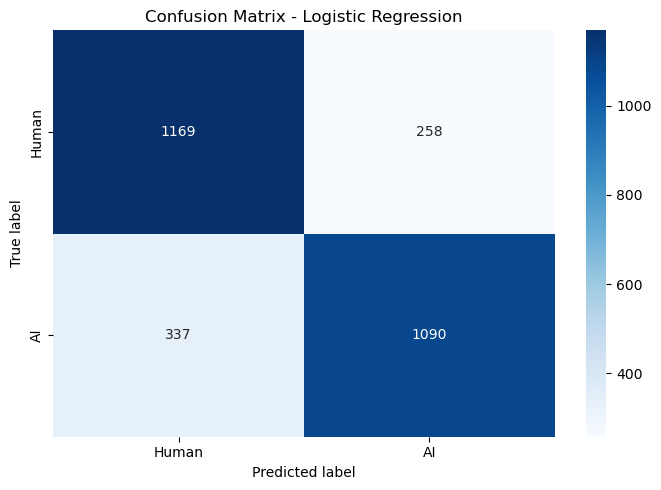

In [56]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(test_df['label'], y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

## –ò–∑–≤–æ–¥–∏ –∑–∞ –ª–æ–≥–∏—Å—Ç–∏—á–Ω–∞—Ç–∞ —Ä–µ–≥—Ä–µ—Å–∏—è:
–ú–æ–¥–µ–ª—ä—Ç –ø–æ—Å—Ç–∏–≥–Ω–∞ —Ç–æ—á–Ω–æ—Å—Ç –æ—Ç 79.15%, –∫–æ–µ—Ç–æ –µ —Å—Ç–∞–±–∏–ª–µ–Ω —Ä–µ–∑—É–ª—Ç–∞—Ç, –ø—Ä–µ–¥–≤–∏–¥ —á–µ —Ä–∞–±–æ—Ç–∏ —Å—ä—Å —Å—Ö–æ–¥–Ω–∏ –ø–æ —Å—Ç–∏–ª —Ç–µ–∫—Å—Ç–æ–≤–µ, –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏ –æ—Ç —Ö–æ—Ä–∞ –∏ AI. –í–∞–∂–Ω–æ –µ, —á–µ —Ç–æ–π —É–ª–∞–≤—è –¥–æ–±—Ä–µ –¥–≤–∞—Ç–∞ –∫–ª–∞—Å–∞, –º–∞–∫–∞—Ä –∏ —Å –∏–∑–≤–µ—Å—Ç–µ–Ω –∫–æ–º–ø—Ä–æ–º–∏—Å –≤ —Ç–æ—á–Ω–æ—Å—Ç—Ç–∞ —Å–ø—Ä—è–º–æ –Ω—è–∫–æ–∏ —Å–ª—É—á–∞–∏.

### True Positive Rate (—á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–Ω–æ—Å—Ç):
–ú–æ–¥–µ–ª—ä—Ç –µ –æ—Ç–∫—Ä–∏–ª 1090 –æ—Ç –æ–±—â–æ 1427 AI —Ç–µ–∫—Å—Ç–∞, –∫–æ–µ—Ç–æ –ø–æ–∫–∞–∑–≤–∞, —á–µ —É—Å–ø–µ—à–Ω–æ —Ä–∞–∑–ø–æ–∑–Ω–∞–≤–∞ –∑–Ω–∞—á–∏—Ç–µ–ª–Ω–∞ —á–∞—Å—Ç –æ—Ç –∏–∑–∫—É—Å—Ç–≤–µ–Ω–æ –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–µ. –¢–æ–∑–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª —Ä–∞–∑–∫—Ä–∏–≤–∞ –∫–æ–ª–∫–æ –µ—Ñ–µ–∫—Ç–∏–≤–µ–Ω –µ –º–æ–¥–µ–ª—ä—Ç –≤ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–∞–Ω–µ—Ç–æ –Ω–∞ AI —Å—ä–¥—ä—Ä–∂–∞–Ω–∏–µ

### True Negative Rate (—Å–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç):
–£—Å–ø–µ—à–Ω–æ —Å–∞ –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞–Ω–∏ 1169 –æ—Ç 1427 —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–∞, –∫–æ–µ—Ç–æ –≥–æ–≤–æ—Ä–∏ –∑–∞ –¥–æ–±—Ä–∞ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç –Ω–∞ –º–æ–¥–µ–ª–∞ –¥–∞ —Ä–∞–∑–≥—Ä–∞–Ω–∏—á–∞–≤–∞ –∞–≤—Ç–µ–Ω—Ç–∏—á–Ω–∏, —á–æ–≤–µ—à–∫–∏ —Å—ä–æ–±—â–µ–Ω–∏—è. –¢–æ–≤–∞ –µ –∫–ª—é—á–æ–≤–æ, –∑–∞ –¥–∞ —Å–µ –∏–∑–±–µ–≥–Ω–∞—Ç –ø–æ–≥—Ä–µ—à–Ω–∏ –æ–±–≤–∏–Ω–µ–Ω–∏—è –∫—ä–º —Ä–µ–∞–ª–Ω–æ –Ω–∞–ø–∏—Å–∞–Ω–∏ –æ—Ç —Ö–æ—Ä–∞ —Ç–µ–∫—Å—Ç–æ–≤–µ.

### False Positive Rate:
258 –æ—Ç —á–æ–≤–µ—à–∫–∏—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–µ —Å–∞ –±–∏–ª–∏ —Å–≥—Ä–µ—à–µ–Ω–∏ –∫–∞—Ç–æ AI, –∫–æ–µ—Ç–æ –ø–æ–∫–∞–∑–≤–∞ –∏–∑–≤–µ—Å—Ç–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ "–ø—Ä–µ–∫–æ–º–µ—Ä–Ω–∞ –ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª–Ω–æ—Å—Ç" –æ—Ç —Å—Ç—Ä–∞–Ω–∞ –Ω–∞ –º–æ–¥–µ–ª–∞.

### False Negative Rate
337 –æ—Ç AI —Ç–µ–∫—Å—Ç–æ–≤–µ—Ç–µ —Å–∞ –±–∏–ª–∏ —Ä–∞–∑–ø–æ–∑–Ω–∞—Ç–∏ –∫–∞—Ç–æ —á–æ–≤–µ—à–∫–∏, –∫–æ–µ—Ç–æ –æ–∑–Ω–∞—á–∞–≤–∞, —á–µ –∏–º–∞ –º—è—Å—Ç–æ –∑–∞ –ø–æ–¥–æ–±—Ä–µ–Ω–∏–µ –ø—Ä–∏ —É–ª–∞–≤—è–Ω–µ—Ç–æ –Ω–∞ –ø–æ-–µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–æ –∑–≤—É—á–∞—â–∏ –∏–∑–∫—É—Å—Ç–≤–µ–Ω–∏ —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∏.

–ë–∞–ª–∞–Ω—Å—ä—Ç –º–µ–∂–¥—É precision –∏ recall –µ –¥–æ–±—ä—Ä –∏ –∑–∞ –¥–≤–∞—Ç–∞ –∫–ª–∞—Å–∞, –∫–æ–µ—Ç–æ –ø–æ–¥—Å–∫–∞–∑–≤–∞, —á–µ –º–æ–¥–µ–ª—ä—Ç –µ —Å—Ç–∞–±–∏–ª–µ–Ω –∏ –Ω—è–º–∞ —Å–µ—Ä–∏–æ–∑–µ–Ω bias –≤ –µ–¥–Ω–∞—Ç–∞ –ø–æ—Å–æ–∫–∞.

# Naive Bayes

In [59]:
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn_nb, fp_nb, fn_nb, tp_nb = cm.ravel()
accuracy_nb = accuracy_score(y_test, y_pred)

print(f"\n –¢–æ—á–Ω–æ—Å—Ç: {accuracy_nb * 100:.2f}%")
print(f" True Positive rate :  {tp_nb} from {tp_nb + fn_nb}")
print(f" True Negative rate :  {tn_nb} from {tn_nb + fp_nb}")
print(f" False Positive rate :  {fp_nb} from {fp_nb + tn_nb}")
print(f" False Negative rate :  {fn_nb} from {fn_nb + tp_nb}")

print("\n Confusion Matrix:")
print(cm)

print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=3))


 –¢–æ—á–Ω–æ—Å—Ç: 74.67%
 True Positive rate :  1115 from 1427
 True Negative rate :  1016 from 1427
 False Positive rate :  411 from 1427
 False Negative rate :  312 from 1427

 Confusion Matrix:
[[1016  411]
 [ 312 1115]]

 Classification Report:
              precision    recall  f1-score   support

           0      0.765     0.712     0.738      1427
           1      0.731     0.781     0.755      1427

    accuracy                          0.747      2854
   macro avg      0.748     0.747     0.746      2854
weighted avg      0.748     0.747     0.746      2854



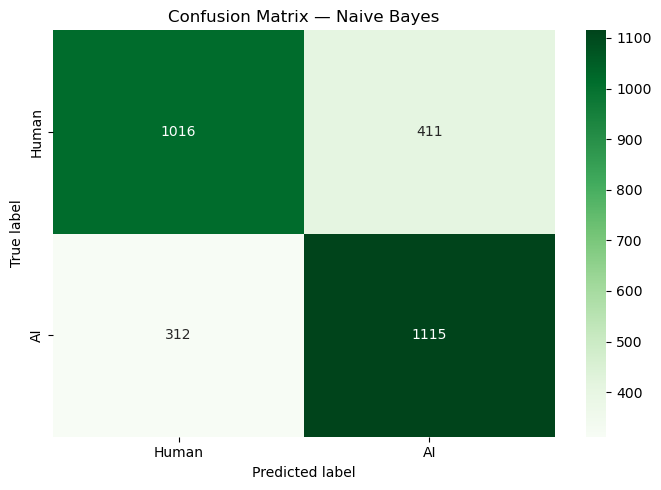

In [60]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Human', 'AI'],
            yticklabels=['Human', 'AI'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix ‚Äî Naive Bayes")
plt.tight_layout()
plt.show()

## –ò–∑–≤–æ–¥–∏ –∑–∞ Naive Bayes:
74.67% ‚Äì –º–æ–¥–µ–ª—ä—Ç –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞ –ø—Ä–∞–≤–∏–ª–Ω–æ –ø–æ—á—Ç–∏ 3 –æ—Ç –≤—Å–µ–∫–∏ 4 —Ç–µ–∫—Å—Ç–∞. –¢–æ–≤–∞ –µ –ø–æ-–Ω–∏—Å–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç —Å–ø—Ä—è–º–æ Logistic Regression, –Ω–æ –ø—Ä–∏–µ–º–ª–∏–≤–∞ –∑–∞ –±—ä—Ä–∑ –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º –º–æ–¥–µ–ª.

### True Positive Rate (—á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–Ω–æ—Å—Ç):
–ú–æ–¥–µ–ª—ä—Ç —É—Å–ø–µ—à–Ω–æ –µ –æ—Ç–∫—Ä–∏–ª 1115 –æ—Ç 1427 AI —Ç–µ–∫—Å—Ç–æ–≤–µ (78.1%) ‚Üí –î–æ–±—Ä–∞ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç –¥–∞ —Ä–∞–∑–ø–æ–∑–Ω–∞–≤–∞ –∏–∑–∫—É—Å—Ç–≤–µ–Ω–æ —Å—ä–¥—ä—Ä–∂–∞–Ω–∏–µ.

### True Negative Rate (—Å–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç):
–£—Å–ø–µ—à–Ω–æ —Å–∞ –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞–Ω–∏ 1016 –æ—Ç 1427 —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (71.2%) ‚Üí –ú–æ–¥–µ–ª—ä—Ç –∏–º–∞ –∏–∑–≤–µ—Å—Ç–Ω–∞ —Å–∫–ª–æ–Ω–Ω–æ—Å—Ç –¥–∞ –æ–±—ä—Ä–∫–≤–∞ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç —Å AI (FP = 411).

### False Negatives (–ø—Ä–æ–ø—É—Å–Ω–∞—Ç–∏ AI —Ç–µ–∫—Å—Ç–æ–≤–µ):
312 –æ—Ç AI —Ç–µ–∫—Å—Ç–æ–≤–µ—Ç–µ —Å–∞ –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞–Ω–∏ –∫–∞—Ç–æ —á–æ–≤–µ—à–∫–∏ ‚Üí –¢–æ–≤–∞ –æ–∑–Ω–∞—á–∞–≤–∞, —á–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —á–∞—Å—Ç –æ—Ç –∏–∑–∫—É—Å—Ç–≤–µ–Ω–∏—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–µ –∑–≤—É—á–∞—Ç —Ç–æ–ª–∫–æ–≤–∞ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–æ, —á–µ –æ–±—ä—Ä–∫–≤–∞—Ç –º–æ–¥–µ–ª–∞. ‚Üí –ü—Ä–∏ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–Ω–∏ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è, –∫–∞—Ç–æ –æ—Ç–∫—Ä–∏–≤–∞–Ω–µ –Ω–∞ AI –∏–∑–º–∞–º–∏ –∏–ª–∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–Ω–æ —Å—ä–¥—ä—Ä–∂–∞–Ω–∏–µ, —Ç–æ–≤–∞ –±–∏ –±–∏–ª–æ –∫—Ä–∏—Ç–∏—á–Ω–æ.

### False Positives (–≥—Ä–µ—à–Ω–æ –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞–Ω–∏ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ):
411 —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–∞ —Å–∞ —Å–≥—Ä–µ—à–µ–Ω–∏ –∫–∞—Ç–æ AI ‚Üí –¢–æ–≤–∞ –µ —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª–Ω–æ –≤–∏—Å–æ–∫–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç, –∫–æ–µ—Ç–æ –ø–æ–¥—Å–∫–∞–∑–≤–∞, —á–µ –º–æ–¥–µ–ª—ä—Ç –µ ‚Äû–ø–æ-–ø–æ–¥–æ–∑—Ä–∏—Ç–µ–ª–µ–Ω‚Äú –∏ —Å–∫–ª–æ–Ω–µ–Ω –¥–∞ –º–∞—Ä–∫–∏—Ä–∞ –Ω—è–∫–æ–∏ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ –∫–∞—Ç–æ –∏–∑–∫—É—Å—Ç–≤–µ–Ω–∏. ‚Üí –¢–æ–≤–∞ –º–æ–∂–µ –¥–∞ –¥–æ–≤–µ–¥–µ –¥–æ —Ñ–∞–ª—à–∏–≤–∏ —Ç—Ä–µ–≤–æ–≥–∏, –∞–∫–æ –∏—Å–∫–∞–º–µ –¥–∞ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–∞–º–µ AI —Å—ä–¥—ä—Ä–∂–∞–Ω–∏–µ —Å –≤–∏—Å–æ–∫–∞ –ø—Ä–µ—Ü–∏–∑–Ω–æ—Å—Ç.

–ú–æ–¥–µ–ª—ä—Ç –µ –ø–æ-—á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫—ä–º AI (—É–ª–∞–≤—è –ø–æ–≤–µ—á–µ –æ—Ç —Ç—è—Ö), –Ω–æ –µ –ø–æ-–ø—Ä–µ—Ü–∏–∑–µ–Ω –ø—Ä–∏ —Ä–∞–∑–ø–æ–∑–Ω–∞–≤–∞–Ω–µ –Ω–∞ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ.

# Random Forest

In [63]:
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn_rf, fp_rf, fn_rf, tp_rf = cm.ravel()
accuracy_rf = accuracy_score(y_test, y_pred)

print(f"\n –¢–æ—á–Ω–æ—Å—Ç: {accuracy_rf * 100:.2f}%")
print(f" True Positive rate :  {tp_rf} from {tp_rf + fn_rf}")
print(f" True Negative rate :  {tn_rf} from {tn_rf + fp_rf}")
print(f" False Positive rate :  {fp_rf} from {fp_rf + tn_rf}")
print(f" False Negative rate :  {fn_rf} from {fn_rf + tp_rf}")

print("\n Confusion Matrix:")
print(cm)

print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=3))


 –¢–æ—á–Ω–æ—Å—Ç: 81.15%
 True Positive rate :  1103 from 1427
 True Negative rate :  1213 from 1427
 False Positive rate :  214 from 1427
 False Negative rate :  324 from 1427

 Confusion Matrix:
[[1213  214]
 [ 324 1103]]

 Classification Report:
              precision    recall  f1-score   support

           0      0.789     0.850     0.818      1427
           1      0.838     0.773     0.804      1427

    accuracy                          0.811      2854
   macro avg      0.813     0.811     0.811      2854
weighted avg      0.813     0.811     0.811      2854



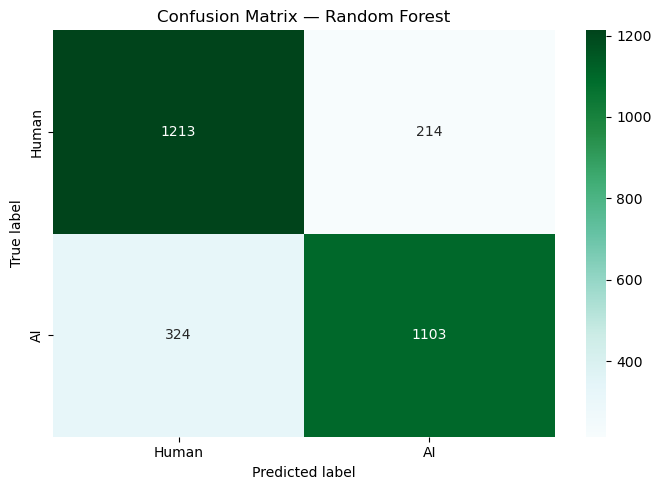

In [64]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix ‚Äî Random Forest")
plt.tight_layout()
plt.show()

## –ò–∑–≤–æ–¥–∏ –∑–∞ Random Forest:
81.15% –ù–∞–π-–≤–∏—Å–æ–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç –¥–æ—Å–µ–≥–∞ –æ—Ç —Ç–µ—Å—Ç–≤–∞–Ω–∏—Ç–µ –º–æ–¥–µ–ª–∏ ‚Äî –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞ –≤—è—Ä–Ω–æ –Ω–∞–¥ 8 –æ—Ç 10 —Ç–µ–∫—Å—Ç–∞, –∫–æ–µ—Ç–æ –µ –æ—Ç–ª–∏—á–µ–Ω —Ä–µ–∑—É–ª—Ç–∞—Ç.

### True Positive Rate (—á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–Ω–æ—Å—Ç):
–û—Ç–∫—Ä–∏—Ç–∏ —Å–∞ 1103 –æ—Ç 1427 AI —Ç–µ–∫—Å—Ç–æ–≤–µ (recall = 77.3%) ‚Üí –ú–æ–¥–µ–ª—ä—Ç –∏–º–∞ —Å–∏–ª–Ω–∞ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç –¥–∞ —Ä–∞–∑–ø–æ–∑–Ω–∞–≤–∞ –∏–∑–∫—É—Å—Ç–≤–µ–Ω–æ —Å—ä–¥—ä—Ä–∂–∞–Ω–∏–µ.

### True Negative Rate (—Å–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ—Å—Ç):
–†–∞–∑–ø–æ–∑–Ω–∞—Ç–∏ —Å–∞ 1213 –æ—Ç 1427 —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ (recall = 85.0%) ‚Üí –û—Ç–ª–∏—á–Ω–æ —Å–ø—Ä–∞–≤—è–Ω–µ –ø—Ä–∏ —Ä–∞–∑–≥—Ä–∞–Ω–∏—á–∞–≤–∞–Ω–µ –Ω–∞ –∞–≤—Ç–µ–Ω—Ç–∏—á–µ–Ω —á–æ–≤–µ—à–∫–∏ –µ–∑–∏–∫.

### False Negatives (–ø—Ä–æ–ø—É—Å–Ω–∞—Ç–∏ AI —Ç–µ–∫—Å—Ç–æ–≤–µ):
324 —Ç–µ–∫—Å—Ç–∞ –Ω–µ —Å–∞ —Ä–∞–∑–ø–æ–∑–Ω–∞—Ç–∏ –∫–∞—Ç–æ –≥–µ–Ω–µ—Ä–∏—Ä–∞–Ω–∏. –¢–æ–≤–∞ –ø–æ–¥—Å–∫–∞–∑–≤–∞, —á–µ –Ω—è–∫–æ–∏ AI —Ç–µ–∫—Å—Ç–æ–≤–µ –∑–≤—É—á–∞—Ç –ø—Ä–µ–∫–∞–ª–µ–Ω–æ ‚Äû–µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–æ‚Äú

### False Positives (–≥—Ä–µ—à–Ω–æ –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞–Ω–∏ —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–æ–≤–µ):
214 —á–æ–≤–µ—à–∫–∏ —Ç–µ–∫—Å—Ç–∞ —Å–∞ –∫–ª–∞—Å–∏—Ñ–∏—Ü–∏—Ä–∞–Ω–∏ –Ω–µ–ø—Ä–∞–≤–∏–ª–Ω–æ –∫–∞—Ç–æ AI. –ü–æ-–Ω–∏—Å–∫–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç —Å–ø—Ä—è–º–æ –ø—Ä–µ–¥—Ö–æ–¥–Ω–∏—Ç–µ –º–æ–¥–µ–ª–∏.

Random Forest –ø–æ—Å—Ç–∏–≥–∞ –Ω–∞–π-—Å–∏–ª–Ω–∏ —Ä–µ–∑—É–ª—Ç–∞—Ç–∏ –¥–æ—Å–µ–≥–∞. –£—Å–ø—è–≤–∞ –¥–∞ –±–∞–ª–∞–Ω—Å–∏—Ä–∞ –º–µ–∂–¥—É –ø—Ä–µ—Ü–∏–∑–Ω–æ—Å—Ç –∏ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–Ω–æ—Å—Ç, –∫–∞—Ç–æ —Ä–µ–¥—É—Ü–∏—Ä–∞ –∏ FP, –∏ FN.

# –ò–∑–≤–æ–¥–∏

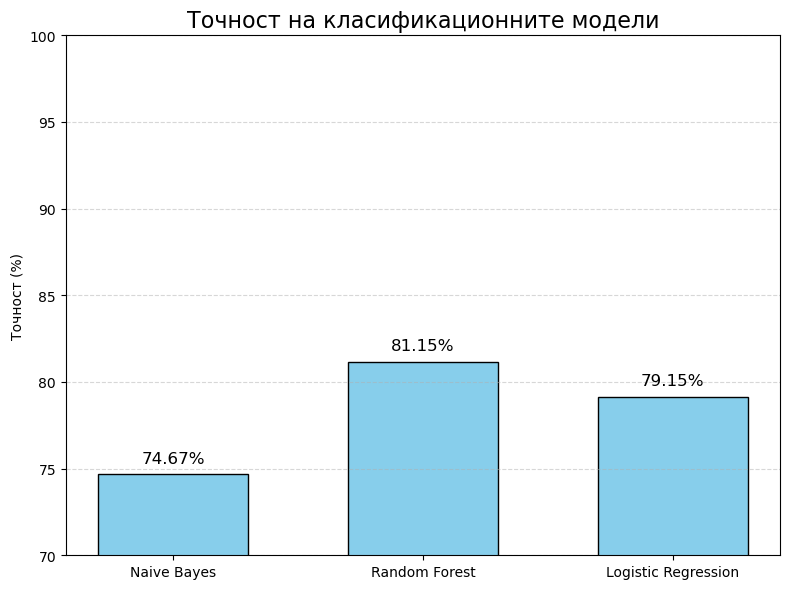

In [67]:
models = ["Naive Bayes", "Random Forest", "Logistic Regression"]
accuracies = [accuracy_nb, accuracy_rf, accuracy_lr]

accuracies_percent = [acc * 100 for acc in accuracies]

# –ì—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies_percent, color='skyblue', edgecolor='black', width=0.6)

plt.title('–¢–æ—á–Ω–æ—Å—Ç –Ω–∞ –∫–ª–∞—Å–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω–∏—Ç–µ –º–æ–¥–µ–ª–∏', fontsize=16)
plt.ylabel('–¢–æ—á–Ω–æ—Å—Ç (%)')
plt.ylim(70, 100)  # –ú–∏–Ω–∏–º–∞–ª–Ω–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç 70%

# –î–æ–±–∞–≤—è–Ω–µ –Ω–∞ —Å—Ç–æ–π–Ω–æ—Å—Ç–∏ –≤—ä—Ä—Ö—É –∫–æ–ª–æ–Ω–∏—Ç–µ
for bar, acc in zip(bars, accuracies_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{acc:.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [68]:
tpr_rates = [tp_nb / (tp_nb + fn_nb),
             tp_rf / (tp_rf + fn_rf),
             tp_lr / (tp_lr + fn_lr)]

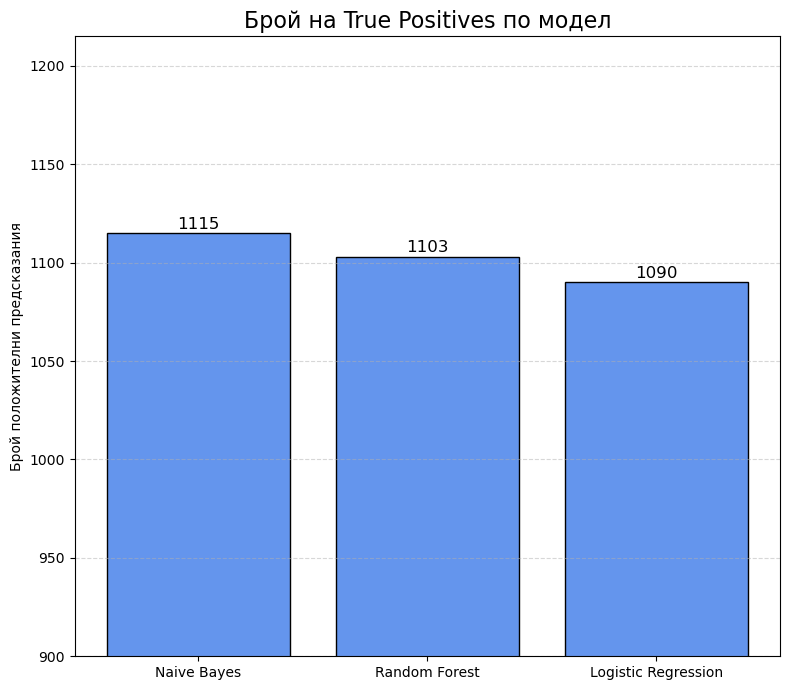

In [69]:
# –ê–±—Å–æ–ª—é—Ç–µ–Ω –±—Ä–æ–π True Positives –∑–∞ –≤—Å–µ–∫–∏ –º–æ–¥–µ–ª
tp_counts = [tp_nb, tp_rf, tp_lr]

plt.figure(figsize=(8, 7))
bars = plt.bar(models, tp_counts, color='cornflowerblue', edgecolor='black')
plt.title('–ë—Ä–æ–π –Ω–∞ True Positives –ø–æ –º–æ–¥–µ–ª', fontsize=16)
plt.ylabel('–ë—Ä–æ–π –ø–æ–ª–æ–∂–∏—Ç–µ–ª–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylim(900, max(tp_counts) + 100)

for bar, tp in zip(bars, tp_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8, f'{tp}', 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

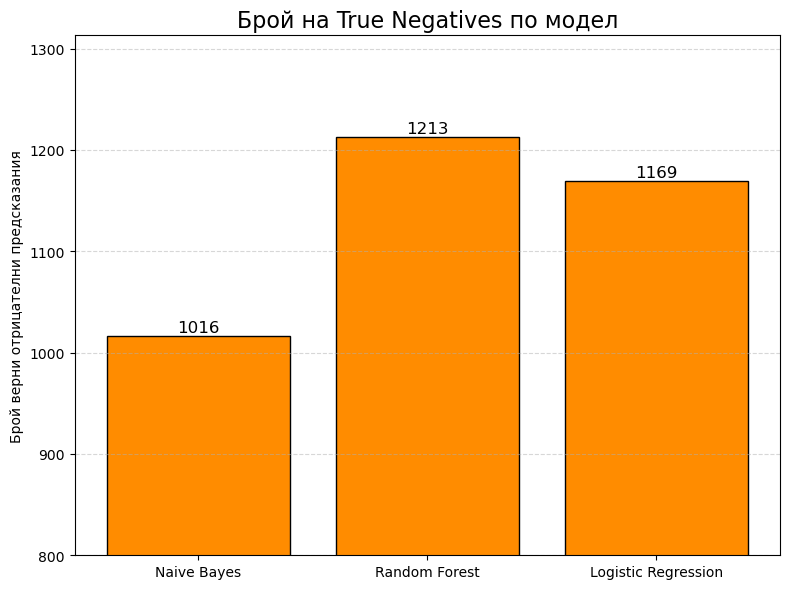

In [70]:
tn_counts = [tn_nb, tn_rf, tn_lr] 

plt.figure(figsize=(8, 6))
bars = plt.bar(models, tn_counts, color='darkorange', edgecolor='black')
plt.title('–ë—Ä–æ–π –Ω–∞ True Negatives –ø–æ –º–æ–¥–µ–ª', fontsize=16)
plt.ylabel('–ë—Ä–æ–π –≤–µ—Ä–Ω–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylim(800, max(tn_counts) + 100)

for bar, tn in zip(bars, tn_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{tn}', 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

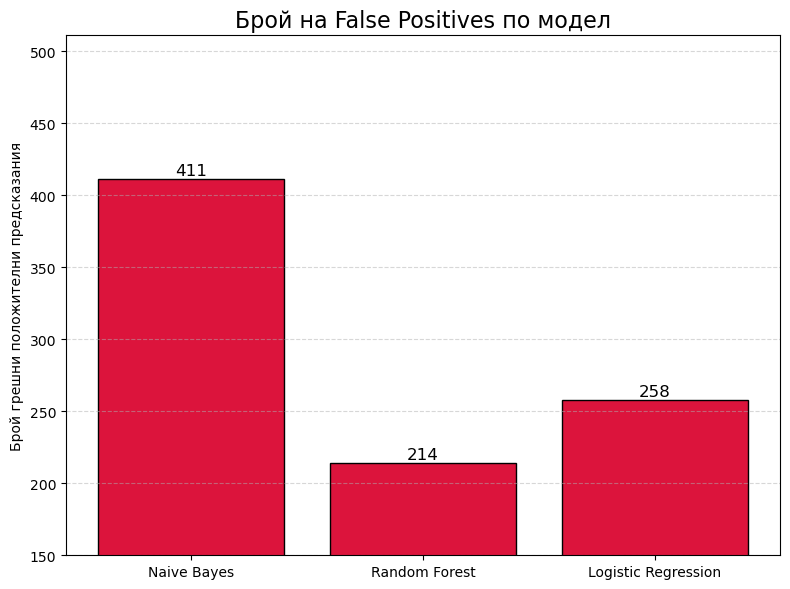

In [71]:
fp_counts = [fp_nb, fp_rf, fp_lr] 

plt.figure(figsize=(8, 6))
bars = plt.bar(models, fp_counts, color='crimson', edgecolor='black')
plt.title('–ë—Ä–æ–π –Ω–∞ False Positives –ø–æ –º–æ–¥–µ–ª', fontsize=16)
plt.ylabel('–ë—Ä–æ–π –≥—Ä–µ—à–Ω–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylim(150, max(fp_counts) + 100)

for bar, fp in zip(bars, fp_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8, f'{fp}', 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

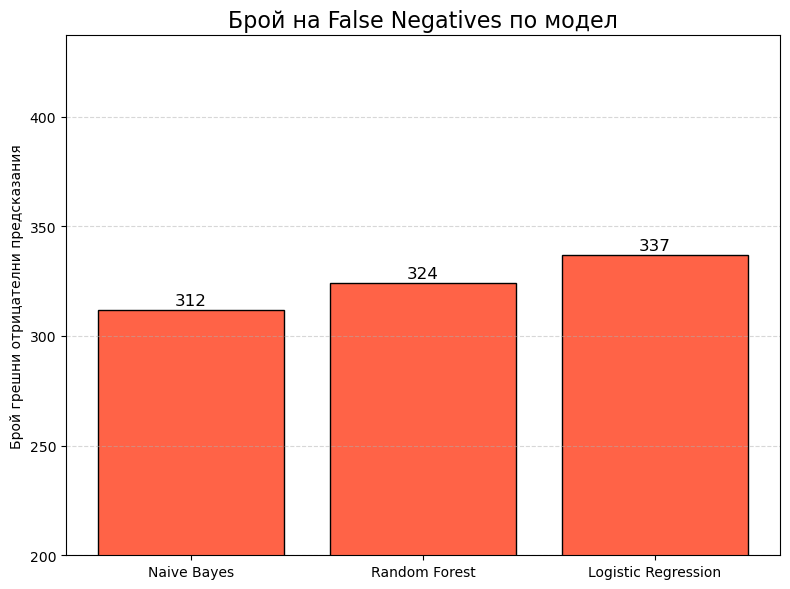

In [72]:
fn_counts = [fn_nb, fn_rf, fn_lr] 

plt.figure(figsize=(8, 6))
bars = plt.bar(models, fn_counts, color='tomato', edgecolor='black')
plt.title('–ë—Ä–æ–π –Ω–∞ False Negatives –ø–æ –º–æ–¥–µ–ª', fontsize=16)
plt.ylabel('–ë—Ä–æ–π –≥—Ä–µ—à–Ω–∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª–Ω–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è')
plt.ylim(200, max(fn_counts) + 100)

for bar, fn in zip(bars, fn_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8, f'{fn}', 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()